In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Isoform headers
```
win_chr: window chr
win_start: window start
win_end: window end
total_isoform: total number of isoforms in the window
isoform_name: the seq id from the original fasta file
sample_from: sample this unique isoform is in
sample_compared_to: sample this isoform is unique to
mapped_start: mapping start (on reference genome)
isoform_sequence: the exact sequence from the original fasta file
```

In [707]:
fname = "unique_isoforms_and_aln_stats_filter/unique_isoforms_and_aln_stats_filter0.995.tsv"
unique_isoform_columns = ["window_chr", "window_start", "window_end", "total_isoform", "isoform_name", "sample_from", "sample_compare_to", "mapped_start", "isoform_sequence"]

isoform_df = pd.read_csv(fname, sep="\t")


In [708]:
total_isoform_per_sample_per_window = isoform_df[["win_chr", "win_start", "win_end", "isoform_name", "sample_from"]].drop_duplicates().groupby(["win_chr", "win_start", "win_end", "sample_from"]).count()["isoform_name"]
                                                                                                          

In [709]:
# get the number of samples each read is unique to
isoform_uniq_count = isoform_df.groupby(["win_chr", "win_start", "win_end","isoform_name","sample_from"]).count()["mapped_start"].reset_index()
isoform_uniq_count["unique_count"] = isoform_uniq_count["mapped_start"]
del isoform_uniq_count["mapped_start"]


In [710]:
# get all chromosomes
chromosomes = isoform_count["win_chr"].drop_duplicates().to_list()

In [711]:
complete_uniq_isoform = isoform_uniq_count[isoform_uniq_count["unique_count"] == 2]

# count the number of complete unique isoform in eah sample in each window
complete_uniq_isoform = complete_uniq_isoform.groupby(["win_chr", "win_start","win_end","sample_from"]).count()["unique_count"]

complete_uniq_isoform2 = pd.DataFrame()
complete_uniq_isoform2["unique_count"] = complete_uniq_isoform
complete_uniq_isoform2 = complete_uniq_isoform2.reset_index()

In [712]:
# get normalized number
normalized_complete_uniq_isoform = complete_uniq_isoform / total_isoform_per_sample_per_window

normalized_complete_uniq_isoform2 = pd.DataFrame()
normalized_complete_uniq_isoform2["unique_count"] = normalized_complete_uniq_isoform
normalized_complete_uniq_isoform2 = normalized_complete_uniq_isoform2.reset_index()

In [768]:
hg2 = normalized_complete_uniq_isoform2[normalized_complete_uniq_isoform2["sample_from"] == "HG002"]
hg4 = normalized_complete_uniq_isoform2[normalized_complete_uniq_isoform2["sample_from"] == "HG004"]
hg5 = normalized_complete_uniq_isoform2[normalized_complete_uniq_isoform2["sample_from"] == "HG005"]

df = normalized_complete_uniq_isoform2
df["hg2"] = hg2["sample_from"]
df["hg4"] = hg4["sample_from"]
df["hg5"] = hg5["sample_from"]

In [769]:
df

,win_chr,win_start,win_end,sample_from,unique_count,hg2,hg4,hg5
0,NC_060925.1,255178,288416,HG004,1.0,NaN,HG004,NaN
1,NC_060925.1,255178,288416,HG005,1.0,NaN,NaN,HG005
2,NC_060925.1,395193,411933,HG002,1.0,HG002,NaN,NaN
3,NC_060925.1,395193,411933,HG004,1.0,NaN,HG004,NaN
4,NC_060925.1,443628,444671,HG002,NaN,HG002,NaN,NaN
...,...,...,...,...,...,...,...,...
15414,NC_060948.1,22103369,22178268,HG005,1.0,NaN,NaN,HG005
15415,NC_060948.1,62320601,62320700,HG005,1.0,NaN,NaN,HG005
15416,NC_060948.1,62344801,62344900,HG005,1.0,NaN,NaN,HG005
15417,NC_060948.1,62364601,62364800,HG004,NaN,NaN,HG004,NaN


In [741]:

def plot_isoform_unique_count(isoform_count, title=""):
    for i,chrom in enumerate(chromosomes[:5]):
        print(i)
        isoform_count1 = isoform_count[(isoform_count["win_chr"] == chrom) & (isoform_count["unique_count"] > 0 )]
        isoform_count1["unique isoform count"] = isoform_count1["unique_count"]
#         isoform_count1["win_start"] = isoform_count1["win_start"].astype(str)
        
        fig, ax = plt.subplots(1)

        sns.lineplot(data=isoform_count1, x="win_start", y="unique isoform count", ax = ax , hue="sample_from")
        ax.set_title(title + " chromosome " + str(i))
        fig.set_size_inches(20,4)

0
1
2
3
4


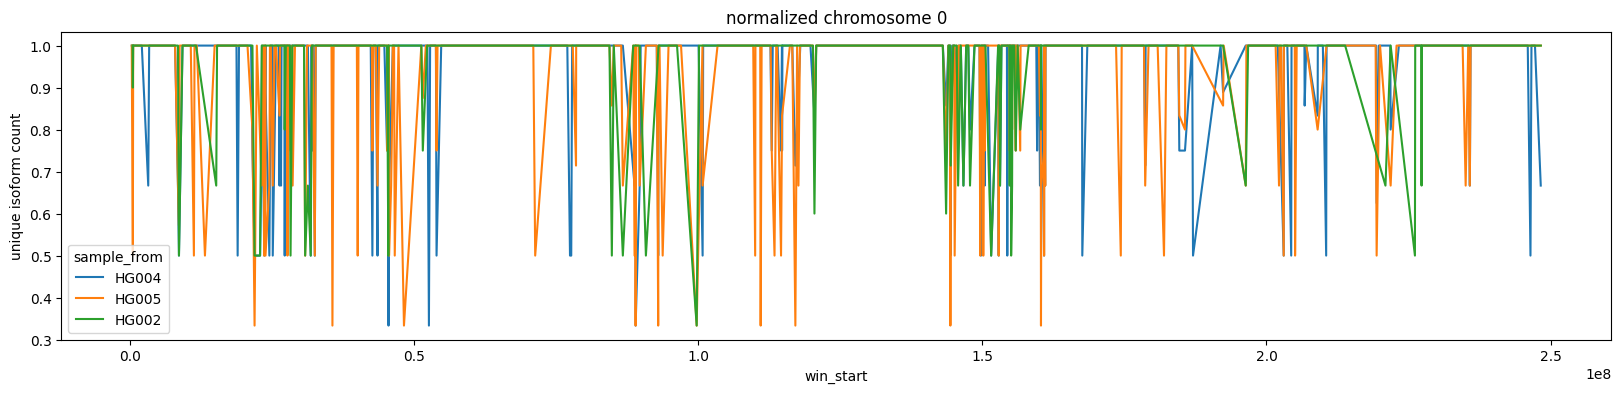

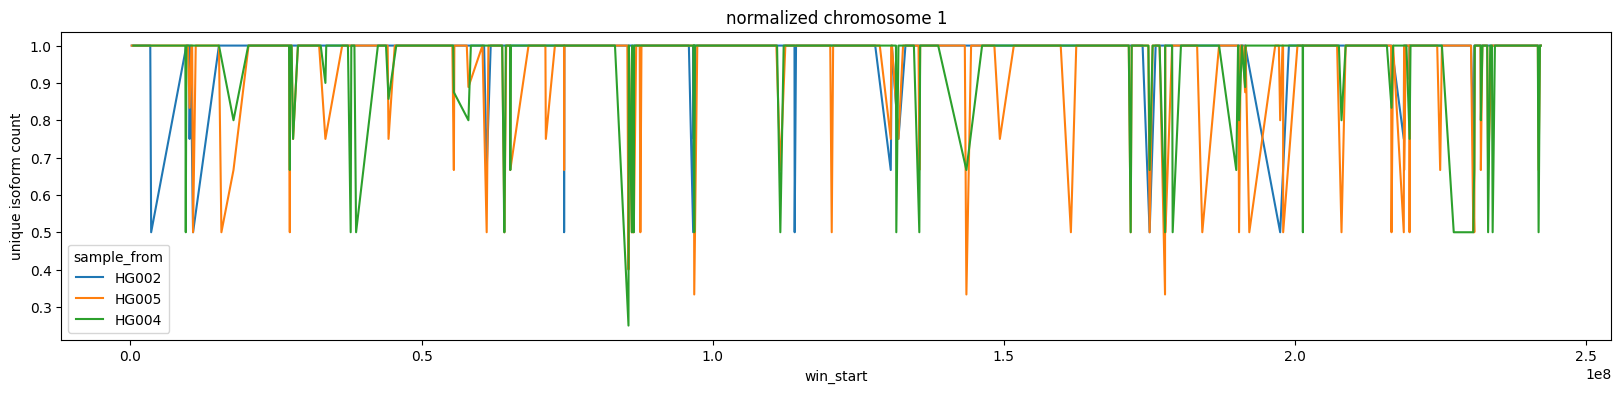

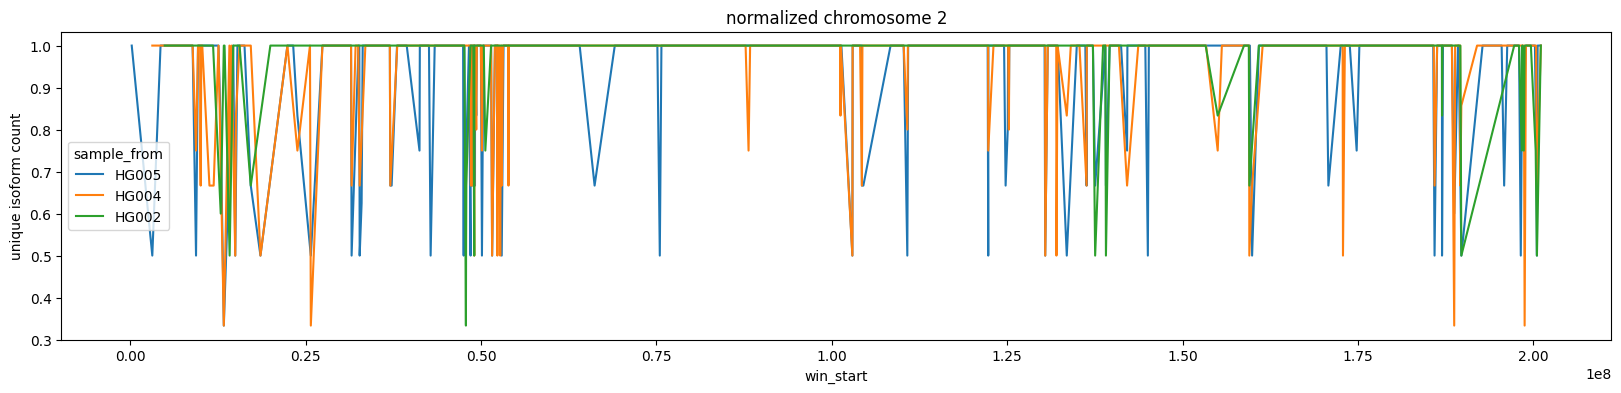

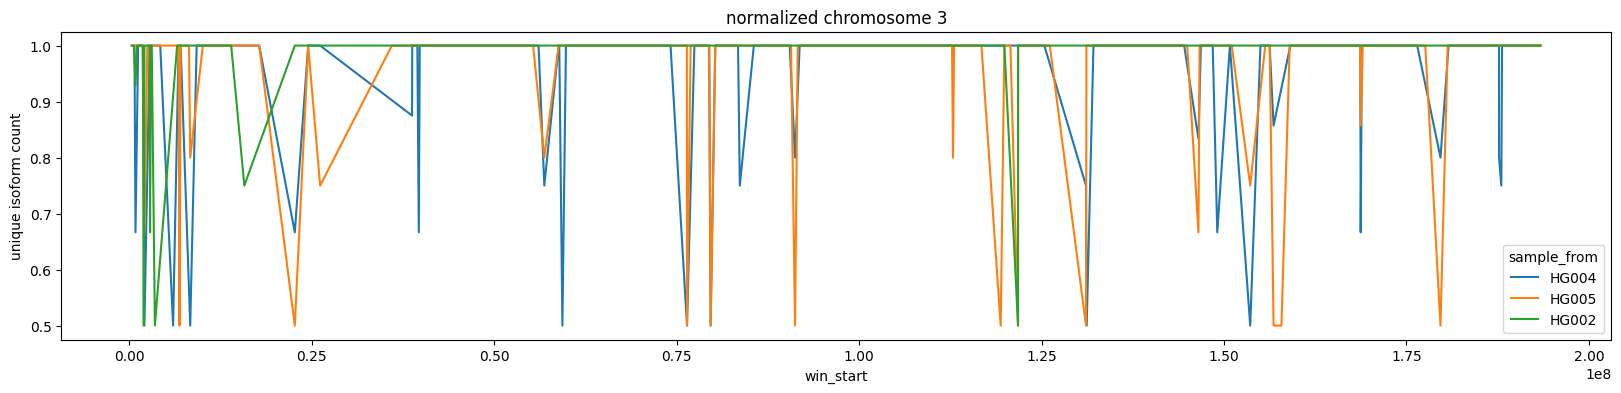

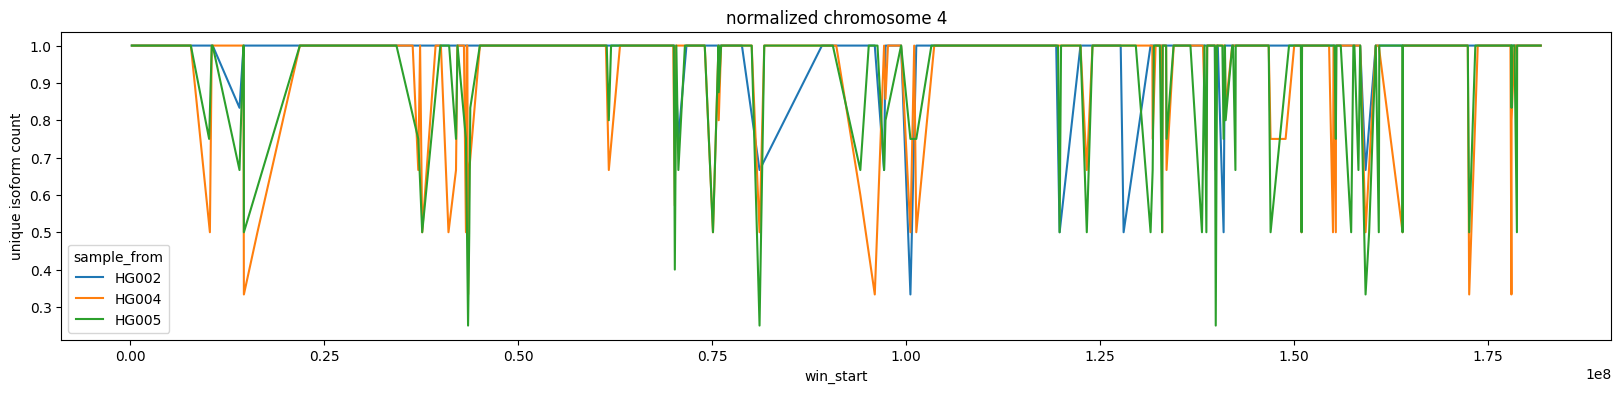

In [742]:
plot_isoform_unique_count(normalized_complete_uniq_isoform2, title="normalized")

0
1
2
3
4


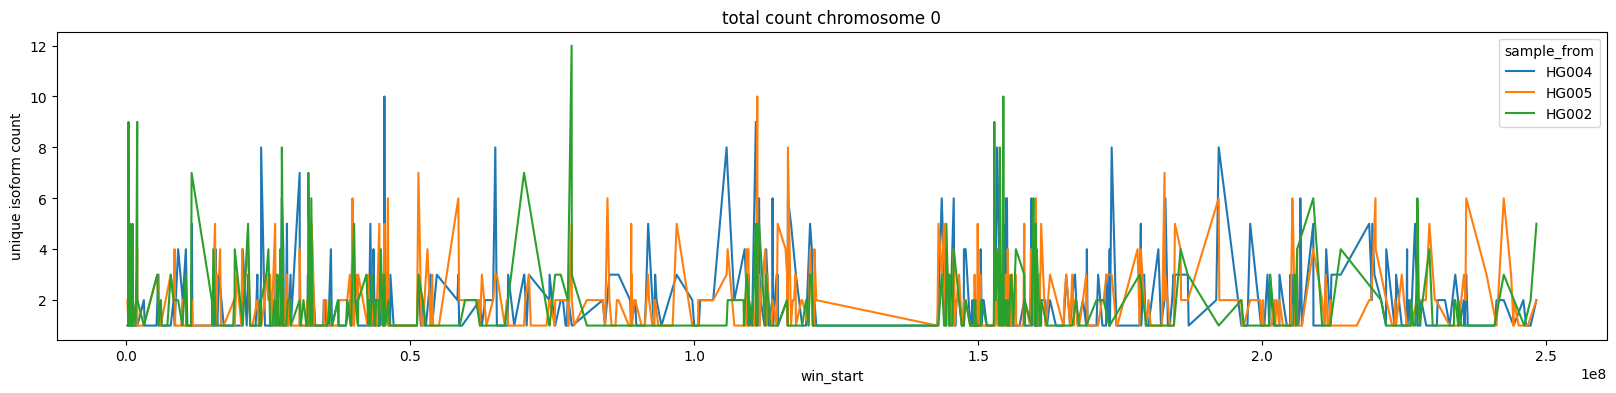

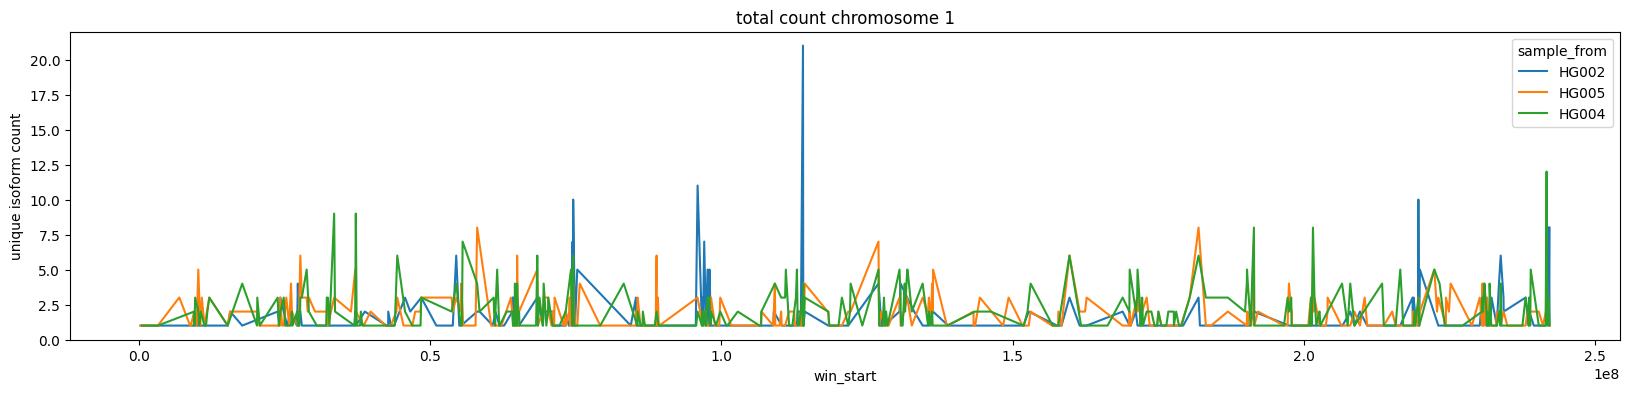

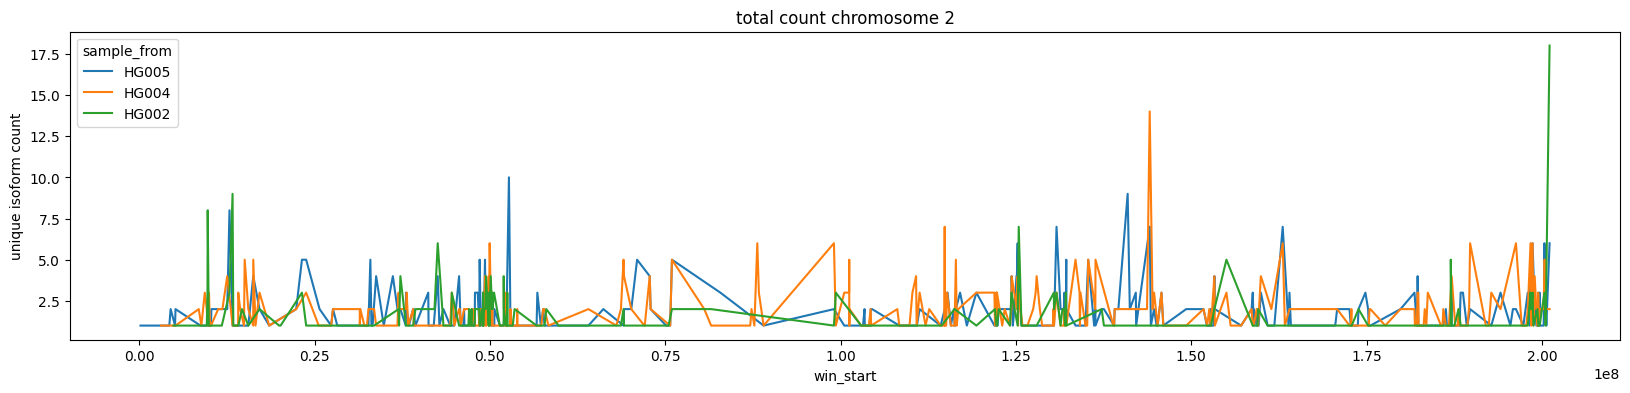

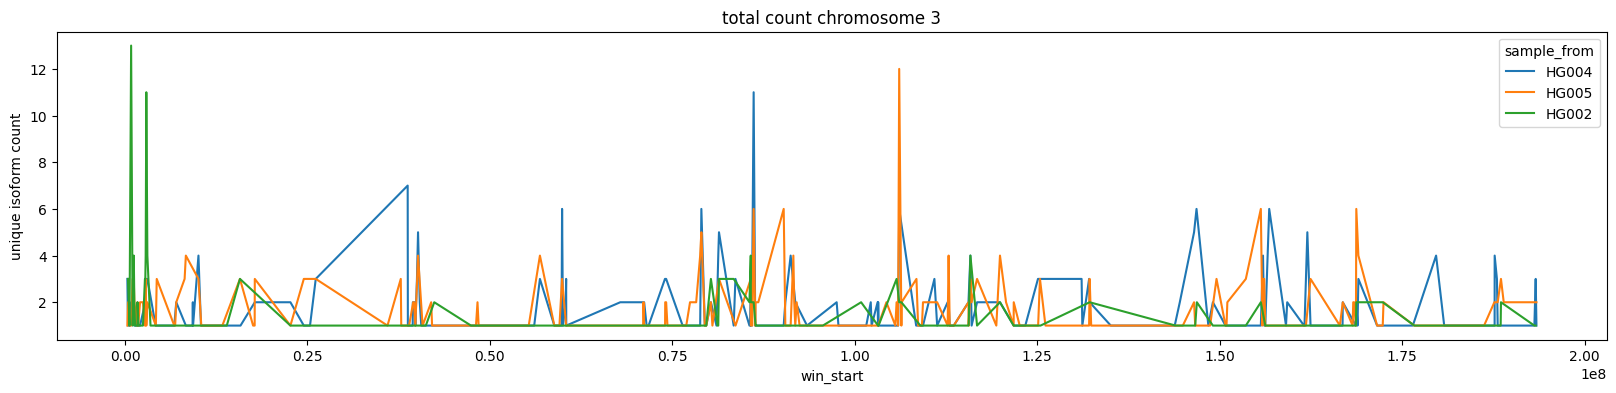

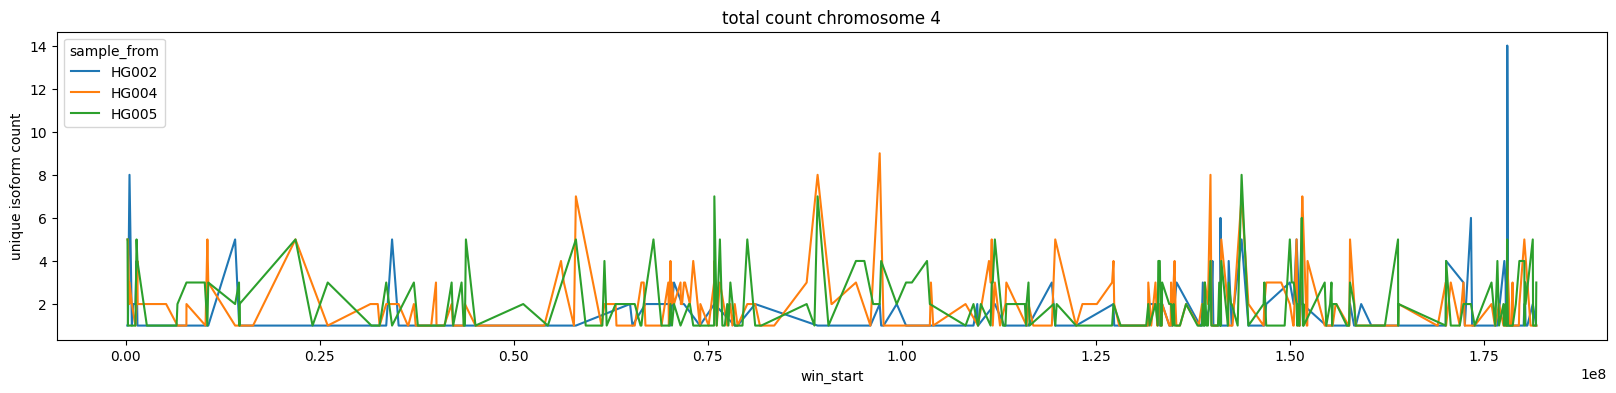

In [740]:
plot_isoform_unique_count(complete_uniq_isoform2, title = "total count")

In [716]:
def plot_total_bar(isoform_counts, method="mean", title=""):
    
    total_per_sample = ""
    if method == "mean":
        total_per_sample = isoform_counts.groupby("sample_from").mean()["unique_count"].reset_index()
    else:
        total_per_sample = isoform_counts.groupby("sample_from").sum()["unique_count"].reset_index()
        
    sns.barplot(data=total_per_sample, x="sample_from", y="unique_count")
    plt.title(method+" " + title)

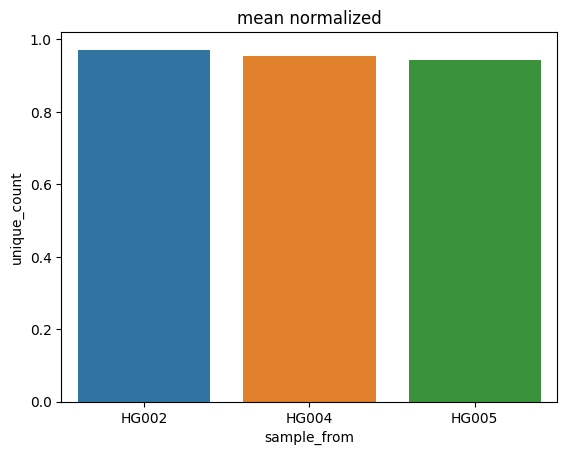

In [717]:
plot_total_bar(normalized_complete_uniq_isoform2, title = "normalized")

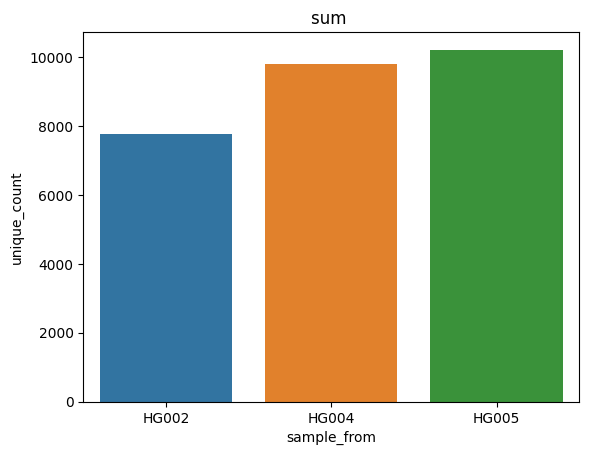

In [743]:
plot_total_bar(complete_uniq_isoform2, method = "sum")

## Make venn diagram

In [744]:
isoform_df["isoform_sequence"].apply(lambda x: len(x)).var()**0.5

941.4333351660916

Text(0.5, 0, 'Length of isoform')

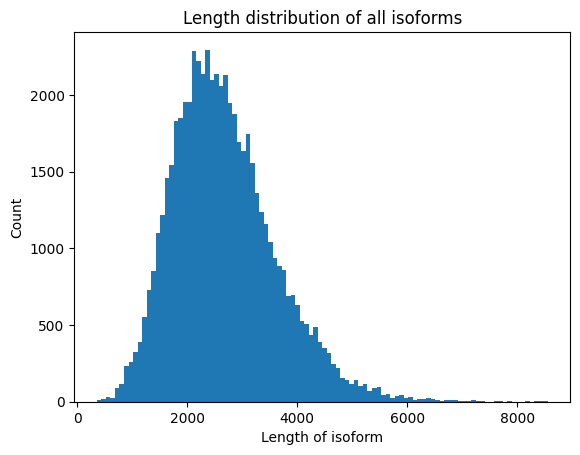

In [745]:
a = plt.hist(isoform_df["isoform_sequence"].apply(lambda x: len(x)), bins=100)
plt.title("Length distribution of all isoforms")
plt.ylabel("Count")
plt.xlabel("Length of isoform")

In [746]:
from collections import defaultdict, Counter

In [747]:
# get all read names
def get_names(fname, all_names):
    for l in open(fname):
        names = l.rstrip("\n").split("_")
        name = names[-1] + "_" + names[0]
        all_names.add(name)
    
    return all_names

all_names = set()
all_names = get_names("/Users/yutongq/SVHackathon2022/minimap2_results_all_samples/hg002_names.txt",all_names)
all_names = get_names("/Users/yutongq/SVHackathon2022/minimap2_results_all_samples/hg004_names.txt",all_names)
all_names = get_names("/Users/yutongq/SVHackathon2022/minimap2_results_all_samples/hg005_names.txt",all_names)

In [748]:
not_in_dict = defaultdict(set)
all_reads = set()

In [749]:
isoform_df.columns

Index(['win_chr', 'win_start', 'win_end', 'total_isoform', 'isoform_name',
       'sample_from', 'sample_compared_to', 'mapped_start', 'isoform_sequence',
       'selected_alignments'],
      dtype='object')

In [750]:
isoform_dict = isoform_df.to_dict()
for i in range(len(isoform_df.index)):
    isoform_name = isoform_dict["isoform_name"][i] + "_" + isoform_dict["sample_from"][i]
    not_in_dict[isoform_dict["sample_compared_to"][i]].add(isoform_name)

In [751]:
sample_contin_read_dict = defaultdict(set)
read_in_sample_dict = defaultdict(set)

for read in all_names:
    for k in not_in_dict:
        if read not in not_in_dict[k]:
            sample_contin_read_dict[k].add(read)
            read_in_sample_dict[read].add(k)

In [752]:
for k in not_in_dict:
    print(k,len(sample_contin_read_dict[k]))

HG002 53105
HG005 56561
HG004 55768


In [753]:
from venn import get_labels, venn3


(<Figure size 900x900 with 1 Axes>, <AxesSubplot: >)

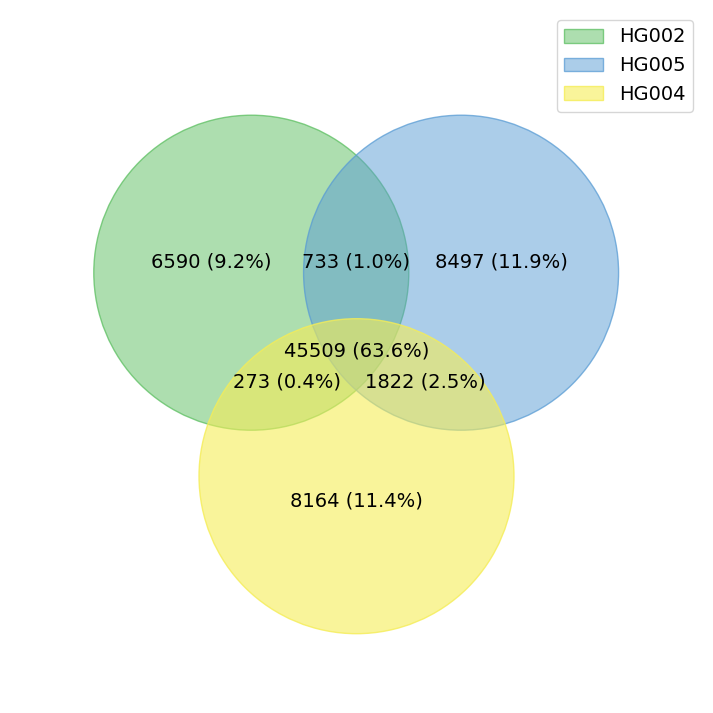

In [761]:
labels = get_labels(sample_contin_read_dict.values(), fill=["percent","number"])
venn3(labels=labels, names=sample_contin_read_dict.keys())
# v = venn(sample_contin_read_dict)
# plt.title("Number of unique and shared isoforms among three samples")


## SQANTI annotation

In [755]:
# read SQANTI annotation
# only extract structural_category
def read_annotation(fname, sample_name, read_category_dict):
    for l in open(fname):
        line = l.rstrip("\n").split("\t")
        if "structural_category" in line:
            continue
        name = line[0] + "_" + sample_name
        category = line[5]
        read_category_dict[name] = category
    return read_category_dict

read_category_dict = {}
read_category_dict = read_annotation("/Users/yutongq/SVHackathon2022/HG002_MM2_classification.txt", "HG002", read_category_dict)
read_category_dict = read_annotation("/Users/yutongq/SVHackathon2022/HG004_MM2_classification.txt", "HG004", read_category_dict)
read_category_dict = read_annotation("/Users/yutongq/SVHackathon2022/HG005_MM2_classification.txt", "HG005", read_category_dict)

In [756]:
read_in_sample_df = defaultdict(list)

for read in read_in_sample_dict:
    read_in_sample_df["isoform name"].append(read)
    read_in_sample_df["SQANTI3 category"].append(read_category_dict[read])
    read_in_sample_df["num samples"].append(len(read_in_sample_dict[read]))
    read_in_sample_df["samples"].append(read_in_sample_dict[read])
    
read_in_sample_df = pd.DataFrame(read_in_sample_df)

In [757]:
num_sample_total = pd.DataFrame(read_in_sample_df.groupby(["num samples"]).count()["isoform name"])

In [758]:
num_sample_total

,isoform name
num samples,
1,23251
2,2828
3,45509


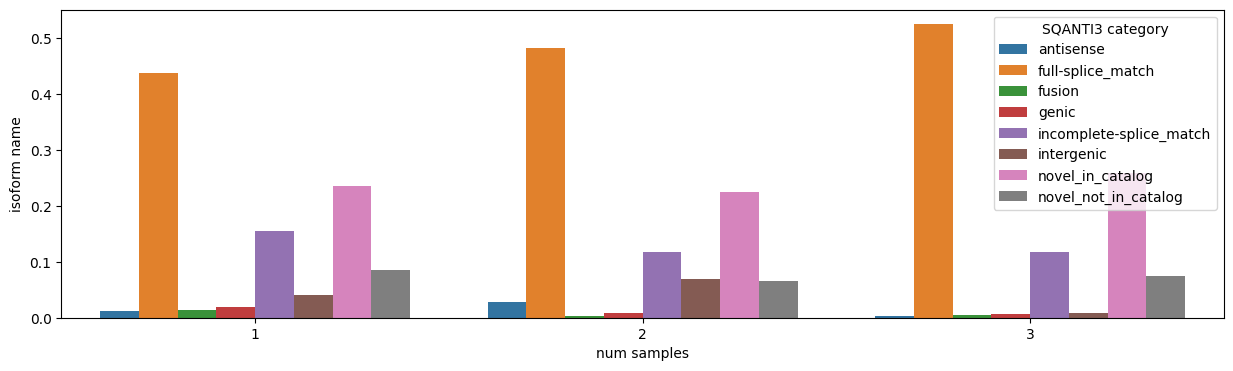

In [759]:
category_count = (read_in_sample_df.groupby(["SQANTI3 category", "num samples"]).count()/num_sample_total).reset_index()

fig, ax= plt.subplots(1)
sns.barplot(data=category_count, hue="SQANTI3 category", y="isoform name", x="num samples", ax= ax)

fig.set_size_inches(15,4)

In [528]:
category_count

,category,num samples,isoform name,samples
0,antisense,1,330,330
1,antisense,2,88,88
2,antisense,3,57,57
3,full-splice_match,1,30995,30995
4,full-splice_match,2,3767,3767
5,full-splice_match,3,671,671
6,fusion,1,528,528
7,fusion,2,11,11
8,genic,1,722,722
9,genic,2,40,40
